In [ ]:
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
from tweepy import API
from tweepy import Cursor
from textblob import TextBlob
import json
import numpy
import pandas
import matplotlib.pyplot as matplotlib
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from nltk import word_tokenize
import nltk
from nltk.tokenize import TweetTokenizer
from pandas_profiling import ProfileReport
import os
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
nltk.download('rslp')



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [ ]:
class authentication():

    def auth(self):
        auth = OAuthHandler('GvDlyVuSK85rhHZcEFgPZrA6U', 'js5ZHqhZqNn2llDbo3ftoHr3T4ukUF86llpAw6S72IB2sFm7jg')
        auth.set_access_token('37265390-Mp1gMvVk4uOTigJ0dq8XeZ8FlR8YX72h9VWFqPs5C', 'HbdMugYjUOyDwBycygqsDI4x6CstgkZLrL8dDhkEzo6Mi')
        return auth

In [ ]:
class Client():
    def __init__(self, user=None):
        self.authentication = authentication()
        self.client = API(self.authentication.auth())
        self.user = user
    def get_client(self):
        return self.client
    def get_tweets(self, lang, number):
        tweets = []
        for tweet in Cursor(self.client.search, q=self.user+" -filter:retweets", lang=lang).items(number):
            tweets.append(tweet)
        return tweets
    def get_timeline_tweets(self, number):
        tweets = []
        for tweet in Cursor(self.client.user_timeline, id=self.user, include_rts=False).items(number):
            tweets.append(tweet)
        return tweets
    def get_followers(self, number):
        followers = []
        for follower in Cursor(self.client.followers, id=self.user).items(number):
            followers.append(follower)
        return followers
    def get_favorites(self, number):
        favorites = []
        for favorite in Cursor(self.client.favorites, id=self.user).items(number):
            favorites.append(favorite)
        return favorites

In [ ]:
class Search():
    def __init__(self):
        self.authentication = authentication()
        self.client = API(self.authentication.auth())
    def search_tweets(self, keys, lang, number):
        tweets = []
        for tweet in Cursor(self.client.search, q=keys+" -filter:retweets", lang=lang).items(number):
            tweets.append(tweet)
        return tweets
    def search_users(self, search, number):
        users = []
        for user in Cursor(self.client.search_users, q=keys).items(number):
            users.append(user)
        return users

In [ ]:
class Streamer():
    def __init__(self):
        self.authentication = authentication()
        self.client = self.authentication.auth()
    def stream(self, fileName, tagList):
        listener = StdoutListener(fileName)
        stream = Stream(self.client, listener)
        stream.filter(track=tagList)

In [ ]:
class StdoutListener(StreamListener):
    def __init__(self, fileName):
        self.fileName = fileName
    def on_data(self, data):
        try:
          data = json.loads(data)
          if(data.place == None): place = 'None'
          else: place = data['place']['full_name']
          with open(self.fileName, "a") as f:
               print(data)
               f.write(data)
          return True
        except BaseException as e:
          print("Error on_data: %s" %str(e))
        return False
    def on_error(self, status):
          if(status == 420):
              return False
          print(status)


# **Treinamento de modelo**

In [ ]:
dataset = pandas.read_csv('Twesis\Arquivo\dataset\Tweets_Mg.csv', encoding='utf-8')

dataset.drop_duplicates(['Text'], inplace=True)
tweets=dataset['Text']
classes=dataset['Classificacao']

def preprocessing(instancia):
        stemmer = nltk.stem.RSLPStemmer()
        instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(',','').replace('@','').replace('/','')
        palavras = [stemmer.stem(i) for i in instancia.split()]
        return (" ".join(palavras))

# Aplica a função em todos os dados:
limpeza = [preprocessing(i) for i in tweets]

vectorizer = CountVectorizer(analyzer="word")
freq_tweets = vectorizer.fit_transform(limpeza)
modelo = MultinomialNB()
modelo.fit(freq_tweets,classes)

In [ ]:
class Analyzer():
    def translate(self, tweet):
        return TextBlob(tweet).translate(to="pt")
    def dataFrame(self, tweets):
        dataFrame = pandas.DataFrame(data=[tweet.text for tweet in tweets], columns=["Tweets"])
        dataFrame["author"] = numpy.array([tweet.user.screen_name for tweet in tweets])
        dataFrame["date"] = numpy.array([tweet.created_at for tweet in tweets])
        dataFrame["lang"] = numpy.array([tweet.lang for tweet in tweets])
        dataFrame["source"] = numpy.array([tweet.source for tweet in tweets])
        dataFrame["likes"] = numpy.array([tweet.favorite_count for tweet in tweets])
        dataFrame["place"] = numpy.array([tweet.place for tweet in tweets])
        dataFrame["retweets"] = numpy.array([tweet.retweet_count for tweet in tweets])
        #dataFrame["coordinates"] = numpy.array([tweet.coordinates.latitude for tweet in tweets])
        #dataFrame["sentiment"] = numpy.array([analyzer.sentiment(tweet) for tweet in tweets])
        return dataFrame

                                               Tweets  ... sentiment
0   gente, alguém pode me recomendar um adaptador ...  ...  Negativo
1     Netflix tirou Mulan do catálogo!! Não acredito!  ...  Negativo
2   romance não, na se quiser desfrutar de uns cha...  ...  Negativo
3    Mais tarde qr lanchar e ver Netflix com meu amor  ...  Positivo
4   Felicidade é ter Amazon, depois de ter enjoado...  ...  Negativo
..                                                ...  ...       ...
95  Mano a série dos templários da Netflix é MT bo...  ...  Negativo
96  podia ter o dragon ball kai no netflix né, nos...  ...  Negativo
97  o filme novo da Netflix me deixou boiolinha pe...  ...  Positivo
98            noiva cadáver na netflix = tudo pra mim  ...  Negativo
99  quem vai ser a amizade sincera que vai me empr...  ...  Positivo

[100 rows x 9 columns]
Negativo    65
Positivo    34
Neutro       1
Name: sentiment, dtype: int64


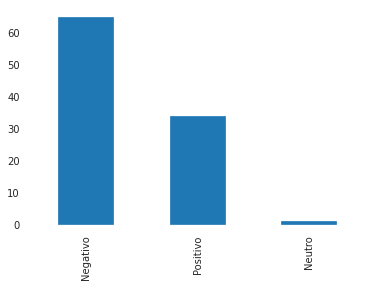

In [ ]:
if(__name__ == "__main__"):
    #agribusiness, coronavirus
    keys = "Netflix"
    lang = "pt" 
    number = 100
    #user = "@robolol1"

    search = Search()
    tweets = search.search_tweets(keys, lang, number)
    #client = Client(user)
    #tweets = client.get_timeline_tweets(number)
    analyzer = Analyzer()
    dataFrame = analyzer.dataFrame(tweets)
    trasform_Tweets=dataFrame['Tweets']

    freq_testes = vectorizer.transform(trasform_Tweets)
    #modelo.predict(freq_testes)
    dataFrame["sentiment"]=modelo.predict(freq_testes)

    
    #print(dataFrame.isnull().sum()  )
    #coordinates
    print(dataFrame.head(number))
    print(pandas.value_counts(dataFrame['sentiment']))
    %matplotlib inline
    dataFrame.sentiment.value_counts().plot(kind='bar')


    #dataFrame.info()
    #print(dataFrame)    

    #print(dir(tweets[0]))
    #data = {
        #"s": (dataFrame["sentiment"].values),
        #"t": (dataFrame["date"].values)
    #}
    #matplotlib.scatter("s", "t", data=data)
    #matplotlib.xlabel('sentiment')
    #matplotlib.ylabel('date')
    #matplotlib.show()

    #time_sentiment = pandas.Series(data=dataFrame["sentiment"].values, index=dataFrame["date"])
    #time_sentiment.plot(figsize=(16, 4), label="Sentimentos", legend=True)
    #matplotlib.show()